In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette("Set2")

from wordcloud import WordCloud

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

#### Loading Dataset

In [2]:
dat = pd.read_csv('data.csv')
dat_artist = pd.read_csv('data_by_artist.csv')
dat_genres = pd.read_csv('data_by_genres.csv')
dat_year = pd.read_csv('data_by_year.csv')

In [3]:
dat

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.98200,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.6650,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.73200,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.1600,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.96100,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.1010,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.96700,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.3810,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.95700,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.2290,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170648,0.6080,2020,0.08460,"['Anuel AA', 'Daddy Yankee', 'KAROL G', 'Ozuna...",0.786,301714,0.808,0,0KkIkfsLEJbrcIhYsCL7L5,0.000289,7,0.0822,-3.702,1,China,72,2020-05-29,0.0881,105.029
170649,0.7340,2020,0.20600,['Ashnikko'],0.717,150654,0.753,0,0OStKKAuXlxA0fMH54Qs6E,0.000000,7,0.1010,-6.020,1,Halloweenie III: Seven Days,68,2020-10-23,0.0605,137.936
170650,0.6370,2020,0.10100,['MAMAMOO'],0.634,211280,0.858,0,4BZXVFYCb76Q0Klojq4piV,0.000009,4,0.2580,-2.226,0,AYA,76,2020-11-03,0.0809,91.688
170651,0.1950,2020,0.00998,['Eminem'],0.671,337147,0.623,1,5SiZJoLXp3WOl3J4C8IK0d,0.000008,2,0.6430,-7.161,1,Darkness,70,2020-01-17,0.3080,75.055


In [4]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

In [5]:
dat.describe()

,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
count,170653.000000,170653.000000,170653.000000,170653.000000,1.706530e+05,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000
mean,0.528587,1976.787241,0.502115,0.537396,2.309483e+05,0.482389,0.084575,0.167010,5.199844,0.205839,-11.467990,0.706902,31.431794,0.098393,116.861590
std,0.263171,25.917853,0.376032,0.176138,1.261184e+05,0.267646,0.278249,0.313475,3.515094,0.174805,5.697943,0.455184,21.826615,0.162740,30.708533
min,0.000000,1921.000000,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000
25%,0.317000,1956.000000,0.102000,0.415000,1.698270e+05,0.255000,0.000000,0.000000,2.000000,0.098800,-14.615000,0.000000,11.000000,0.034900,93.421000
50%,0.540000,1977.000000,0.516000,0.548000,2.074670e+05,0.471000,0.000000,0.000216,5.000000,0.136000,-10.580000,1.000000,33.000000,0.045000,114.729000
75%,0.747000,1999.000000,0.893000,0.668000,2.624000e+05,0.703000,0.000000,0.102000,8.000000,0.261000,-7.183000,1.000000,48.000000,0.075600,135.537000
max,1.000000,2020.000000,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.970000,243.507000


In [6]:
dat_artist

,mode,count,acousticness,artists,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,9,0.590111,"""Cats"" 1981 Original London Cast",0.467222,250318.555556,0.394003,0.011400,0.290833,-14.448000,0.210389,117.518111,0.389500,38.333333,5
1,1,26,0.862538,"""Cats"" 1983 Broadway Cast",0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,30.576923,5
2,1,7,0.856571,"""Fiddler On The Roof” Motion Picture Chorus",0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.857143,0
3,1,27,0.884926,"""Fiddler On The Roof” Motion Picture Orchestra",0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.851852,0
4,1,7,0.510714,"""Joseph And The Amazing Technicolor Dreamcoat""...",0.467143,270436.142857,0.488286,0.009400,0.195000,-10.236714,0.098543,122.835857,0.482286,43.000000,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28675,1,2,0.512000,麥志誠,0.356000,198773.000000,0.306000,0.008970,0.108000,-10.119000,0.027700,150.049000,0.328000,35.000000,10
28676,0,2,0.541000,黃品源,0.578000,293840.000000,0.334000,0.000006,0.067500,-11.974000,0.026700,135.934000,0.243000,48.000000,9
28677,1,11,0.785455,黃國隆,0.570818,174582.727273,0.148400,0.000083,0.142191,-21.610091,0.054355,119.586273,0.741273,23.000000,5
28678,1,2,0.381000,黑豹,0.353000,316160.000000,0.686000,0.000000,0.056800,-9.103000,0.039500,200.341000,0.352000,35.000000,11


In [7]:
dat_artist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28680 entries, 0 to 28679
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              28680 non-null  int64  
 1   count             28680 non-null  int64  
 2   acousticness      28680 non-null  float64
 3   artists           28680 non-null  object 
 4   danceability      28680 non-null  float64
 5   duration_ms       28680 non-null  float64
 6   energy            28680 non-null  float64
 7   instrumentalness  28680 non-null  float64
 8   liveness          28680 non-null  float64
 9   loudness          28680 non-null  float64
 10  speechiness       28680 non-null  float64
 11  tempo             28680 non-null  float64
 12  valence           28680 non-null  float64
 13  popularity        28680 non-null  float64
 14  key               28680 non-null  int64  
dtypes: float64(11), int64(3), object(1)
memory usage: 3.3+ MB


In [8]:
dat_year

,mode,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,1921,0.886896,0.418597,260537.166667,0.231815,0.344878,0.205710,-17.048667,0.073662,101.531493,0.379327,0.653333,2
1,1,1922,0.938592,0.482042,165469.746479,0.237815,0.434195,0.240720,-19.275282,0.116655,100.884521,0.535549,0.140845,10
2,1,1923,0.957247,0.577341,177942.362162,0.262406,0.371733,0.227462,-14.129211,0.093949,114.010730,0.625492,5.389189,0
3,1,1924,0.940200,0.549894,191046.707627,0.344347,0.581701,0.235219,-14.231343,0.092089,120.689572,0.663725,0.661017,10
4,1,1925,0.962607,0.573863,184986.924460,0.278594,0.418297,0.237668,-14.146414,0.111918,115.521921,0.621929,2.604317,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,2016,0.284171,0.600202,221396.510295,0.592855,0.093984,0.181170,-8.061056,0.104313,118.652630,0.431532,59.647190,0
96,1,2017,0.286099,0.612217,211115.696787,0.590421,0.097091,0.191713,-8.312630,0.110536,117.202740,0.416476,63.263554,1
97,1,2018,0.267633,0.663500,206001.007133,0.602435,0.054217,0.176326,-7.168785,0.127176,121.922308,0.447921,63.296243,1
98,1,2019,0.278299,0.644814,201024.788096,0.593224,0.077640,0.172616,-7.722192,0.121043,120.235644,0.458818,65.256542,1


In [9]:
dat_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              100 non-null    int64  
 1   year              100 non-null    int64  
 2   acousticness      100 non-null    float64
 3   danceability      100 non-null    float64
 4   duration_ms       100 non-null    float64
 5   energy            100 non-null    float64
 6   instrumentalness  100 non-null    float64
 7   liveness          100 non-null    float64
 8   loudness          100 non-null    float64
 9   speechiness       100 non-null    float64
 10  tempo             100 non-null    float64
 11  valence           100 non-null    float64
 12  popularity        100 non-null    float64
 13  key               100 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 11.1 KB


In [10]:
dat_genres

,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,21st century classical,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333,6
1,1,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000,5
2,1,8-bit,0.762000,0.712000,1.151770e+05,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000,7
3,1,[],0.651417,0.529093,2.328809e+05,0.419146,0.205309,0.218696,-12.288965,0.107872,112.857352,0.513604,20.859882,7
4,1,a cappella,0.676557,0.538961,1.906285e+05,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2968,1,zolo,0.222625,0.547082,2.580991e+05,0.610240,0.143872,0.204206,-11.295878,0.061088,125.494919,0.596155,33.778943,9
2969,0,zouglou,0.161000,0.863000,2.063200e+05,0.909000,0.000000,0.108000,-5.985000,0.081300,119.038000,0.845000,58.000000,7
2970,1,zouk,0.263261,0.748889,3.060728e+05,0.622444,0.257227,0.089678,-10.289222,0.038778,101.965222,0.824111,46.666667,5
2971,0,zurich indie,0.993000,0.705667,1.984173e+05,0.172667,0.468633,0.179667,-11.453333,0.348667,91.278000,0.739000,0.000000,7


In [11]:
dat_genres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2973 entries, 0 to 2972
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              2973 non-null   int64  
 1   genres            2973 non-null   object 
 2   acousticness      2973 non-null   float64
 3   danceability      2973 non-null   float64
 4   duration_ms       2973 non-null   float64
 5   energy            2973 non-null   float64
 6   instrumentalness  2973 non-null   float64
 7   liveness          2973 non-null   float64
 8   loudness          2973 non-null   float64
 9   speechiness       2973 non-null   float64
 10  tempo             2973 non-null   float64
 11  valence           2973 non-null   float64
 12  popularity        2973 non-null   float64
 13  key               2973 non-null   int64  
dtypes: float64(11), int64(2), object(1)
memory usage: 325.3+ KB


In [12]:
song_info_features = ['name', 'artists', 'id', 'release_date', 'year', 'popularity']
song_features_normalized = ['valence', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness']
song_features_not_normalized = ['duration_ms', 'key', 'loudness', 'mode', 'tempo']

In [13]:
dat_mean_year = dat_year.groupby('year').mean().reset_index()

print("The number of inconsistent values in the dataset is: ")
np.sum(dat_mean_year[['acousticness', 'danceability', 'energy', 'liveness', 'speechiness', 'valence']].values != dat_year.groupby('year').mean()[['acousticness', 'danceability', 'energy', 'liveness', 'speechiness', 'valence']].values)

The number of inconsistent values in the dataset is: 


0

In [14]:
# add a column of dacade to the dataset 
dat['decade'] = ((dat['year'] - 1)//10)*10
dat_year['decade'] = ((dat_year['year'] - 1)//10)*10

## EDA - Exploratory Data Analysis

#### EDA by Decade

C:\Users\donda\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\donda\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\donda\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


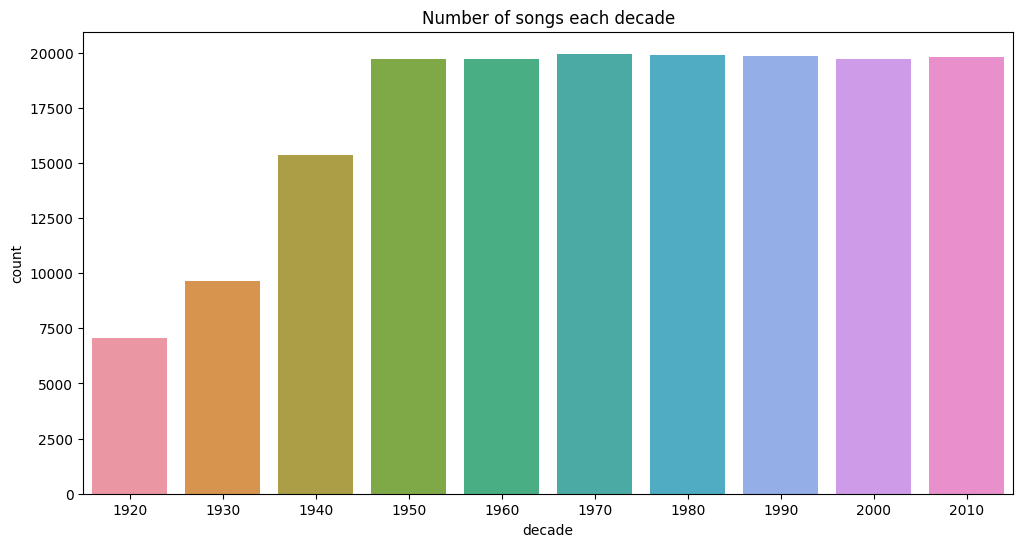

In [15]:
# plot the total number of songs each decade
plt.figure(figsize=(12,6))
sns.countplot(x='decade', data=dat)
plt.title('Number of songs each decade')
plt.show()

C:\Users\donda\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\donda\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\donda\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\donda\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a fu

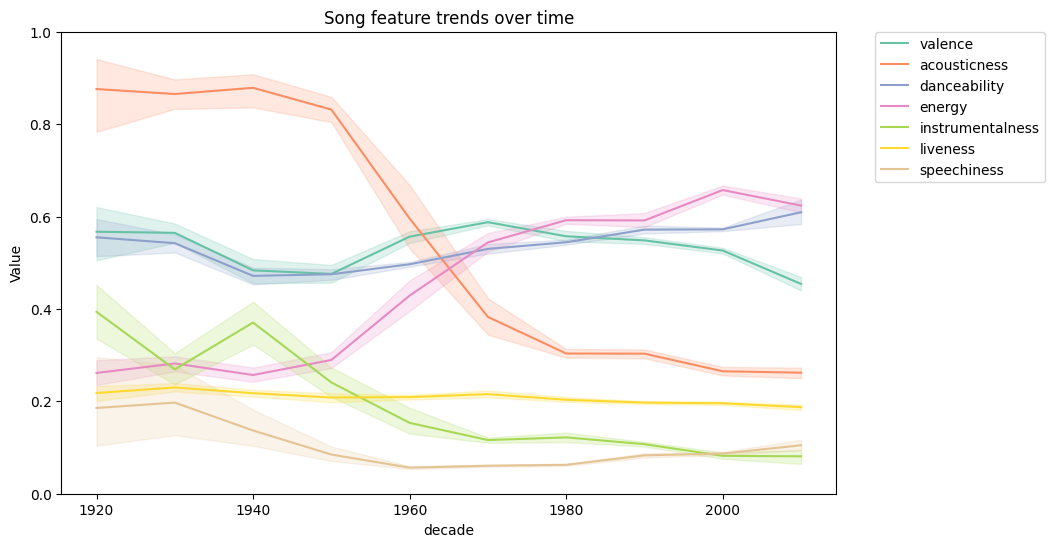

In [16]:
# how the song features change over time
plt.figure(figsize=(10, 6))
for feature in song_features_normalized:
    sns.lineplot(x='decade', y=feature, data=dat_year, label=feature)
plt.ylabel('Value')
plt.ylim(0, 1)
plt.title('Song feature trends over time')
# set legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

C:\Users\donda\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\donda\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\donda\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\donda\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a fu

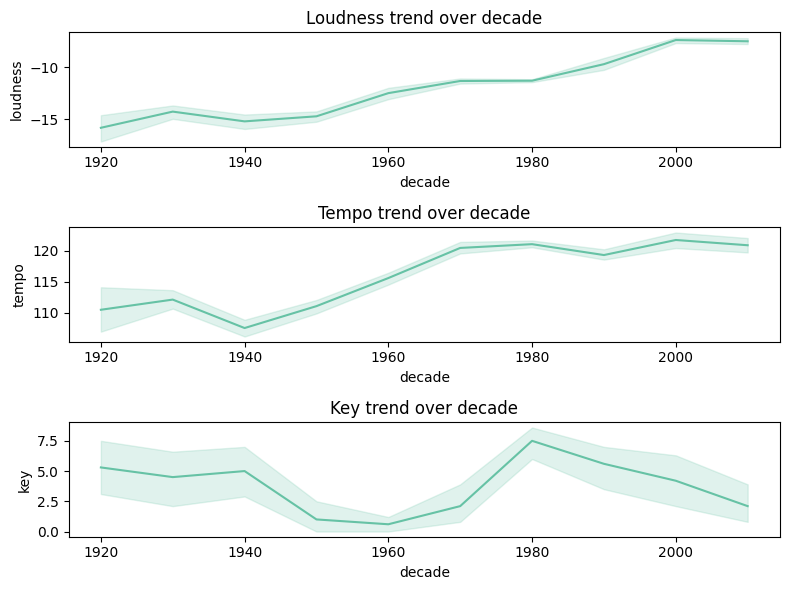

In [17]:
# plot the trends of loudness, tempo, key by year in subplots 
fig, axes = plt.subplots(3, 1, figsize=(8, 6))
sns.lineplot(x='decade', y='loudness', data=dat_year, ax=axes[0])
sns.lineplot(x='decade', y='tempo', data=dat_year, ax=axes[1])
sns.lineplot(x='decade', y='key', data=dat_year, ax=axes[2])
axes[0].set_title('Loudness trend over decade')
axes[1].set_title('Tempo trend over decade')
axes[2].set_title('Key trend over decade')
plt.tight_layout()
plt.show()

#### EDA by Artist

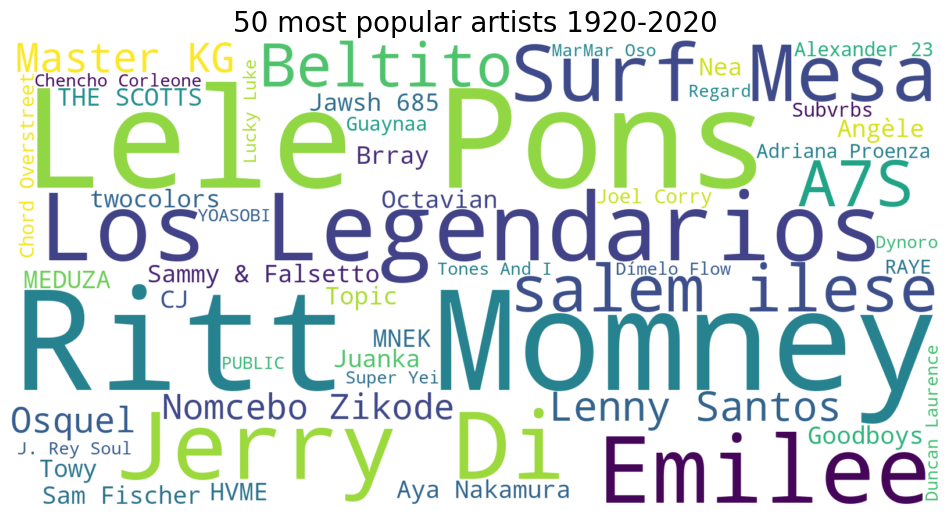

In [18]:
# plot a word cloud of the most popular artists over time
# create a dictionary of artist and their popularity
artist_popularity = dat_artist[['artists', 'popularity']].set_index('artists').to_dict()['popularity']
# sort the dictionary by value
artist_popularity = sorted(artist_popularity.items(), key=lambda x: x[1], reverse=True)

# create a word cloud
wordcloud = WordCloud(width=1600, height=800, max_words=50, background_color='white').generate_from_frequencies(dict(artist_popularity))
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('50 most popular artists 1920-2020', fontsize=20)
plt.show()

In [19]:
# we can also check the most popular artists in each decade
# create a dictionary of artist and their popularity
artist_popularity_decade = dat.groupby(['decade', 'artists'])['popularity'].mean().reset_index()
artist_popularity_decade = artist_popularity_decade.sort_values(by=['decade', 'popularity'], ascending=False)
# # select the first artist in each decade
artist_popularity_decade = artist_popularity_decade.groupby('decade').head(1)
artist_popularity_decade

,decade,artists,popularity
33530,2010,"['Bad Bunny', 'Jhay Cortez']",100.0
31225,2000,"['Shakira', 'Wyclef Jean']",83.0
21963,1990,"['Frank Sinatra', 'B. Swanson Quartet']",80.0
17449,1980,"['Grover Washington, Jr.', 'Bill Withers']",79.0
13396,1970,"['Blue Swede', 'Björn Skifs']",75.0
11228,1960,"['Frank Sinatra', 'Nancy Sinatra']",71.0
7650,1950,['Gayla Peevey'],61.0
3154,1940,"['Bing Crosby', 'The Andrews Sisters']",59.2
2300,1930,"['Richard Himber and his Orchestra', 'Johnny M...",35.0
93,1920,"['Benny Goodman', 'Peggy Lee']",38.0


#### EDA by Genre

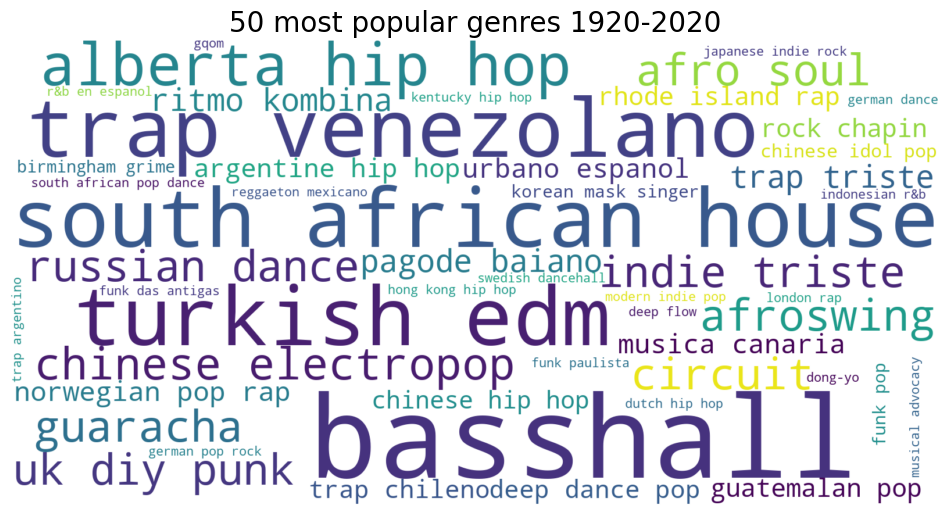

In [20]:
# plot a word cloud of the most popular genres over time
# create a dictionary of genre and their popularity
genre_popularity = dat_genres[['genres', 'popularity']].set_index('genres').to_dict()['popularity']
# sort the dictionary by value
genre_popularity = sorted(genre_popularity.items(), key=lambda x: x[1], reverse=True)

# create a word cloud
wordcloud = WordCloud(width=1600, height=800, max_words=50, background_color='white').generate_from_frequencies(dict(genre_popularity))
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('50 most popular genres 1920-2020', fontsize=20)
plt.show()

In [21]:
# define song features
# features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'speechiness', 'valence', 'tempo']
song_featues = song_features_normalized + song_features_not_normalized
# standardize the features
scaler = StandardScaler()
feature_for_cluster = scaler.fit_transform(dat_genres[song_featues])

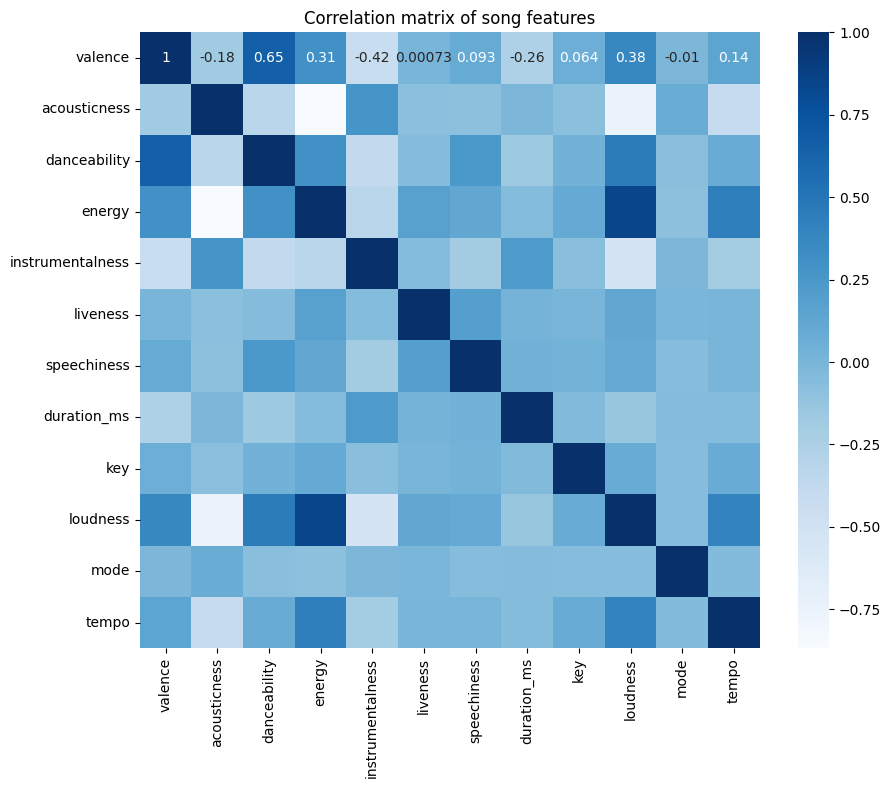

In [22]:
# make a correlation matrix of the song features
corr = np.corrcoef(feature_for_cluster.T)

# plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True , xticklabels=song_featues, yticklabels=song_featues, cmap='Blues')
plt.title('Correlation matrix of song features')
plt.show()

In [23]:
# apply dimensionality reduction to the standardized song features

# one way is to use PCA
# pca = PCA(n_components=2)
# feature_for_cluster_dim_redu = pca.fit_transform(feature_for_cluster)

# another way is to use t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=0)
feature_for_cluster_dim_redu = tsne.fit_transform(feature_for_cluster)

c:\Users\donda\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\donda\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\donda\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\donda\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

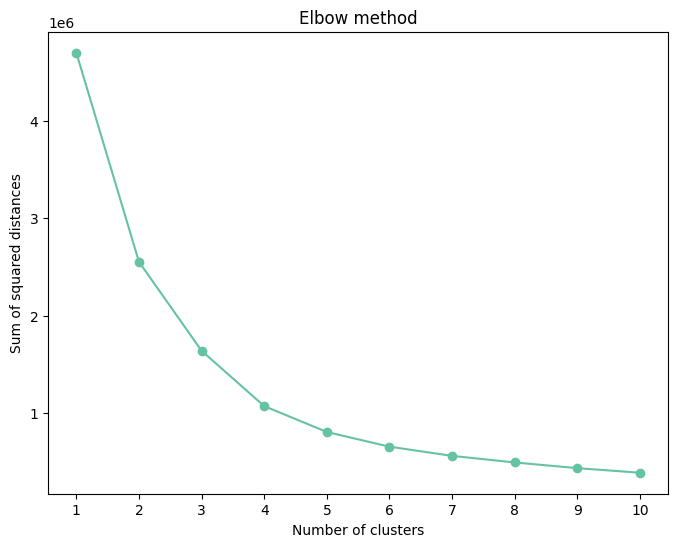

In [24]:
# use the elbow method to find the optimal number of clusters
# calculate the sum of squared distances for different number of cluster
ssd = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(feature_for_cluster_dim_redu)
    ssd.append(kmeans.inertia_)
# plot the sum of squared distances for different number of cluster
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), ssd, marker='o')
plt.xticks(range(1, 11))
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.title('Elbow method')
plt.show()

c:\Users\donda\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\donda\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\donda\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\donda\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and wil

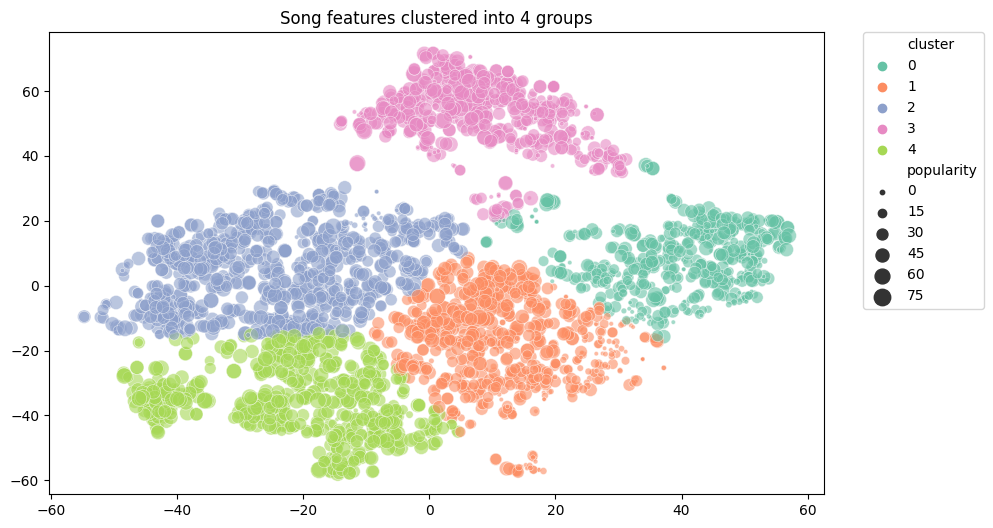

In [25]:
# cluster the features into 5 clusters using KMeans
kmeans = KMeans(n_clusters=5, random_state=0).fit(feature_for_cluster_dim_redu)
# add the cluster labels to the dataset
dat_genres['cluster'] = kmeans.labels_

# plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=feature_for_cluster_dim_redu[:, 0], y=feature_for_cluster_dim_redu[:, 1], 
                hue=dat_genres['cluster'], palette='Set2', size=dat_genres['popularity'], sizes=(10, 150), alpha=0.6)
# set legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Song features clustered into 4 groups')
plt.show()

In [26]:
popular_genres = dat_genres.groupby('cluster')[['genres', 'popularity']].apply(lambda x: x.nlargest(5, columns='popularity')).reset_index()

for i in range(5):
    print(f"Cluster {i} : {popular_genres.query('cluster == @i')['genres'].tolist()}")

Cluster 0 : ['irish indie', 'lo-fi house', 'shush', 'white noise', 'lo-fi chill']
Cluster 1 : ['indie triste', 'guatemalan pop', 'rock chapin', 'chinese hip hop', 'modern indie pop']
Cluster 2 : ['circuit', 'guaracha', 'russian dance', 'trap chileno', 'japanese indie rock']
Cluster 3 : ['turkish edm', 'alberta hip hop', 'chinese electropop', 'afroswing', 'afro soul']
Cluster 4 : ['basshall', 'south african house', 'trap venezolano', 'trap triste', 'urbano espanol']


In [27]:
# find the most central genre in each cluster

# calculate the distance between each genre and the cluster center
genre_cluster_center = []
for i in range(5):
    genre_cluster_center.append(dat_genres.query('cluster == @i')[song_featues].mean().values)
genre_cluster_center = np.array(genre_cluster_center)

# calculate the distance between each genre and the cluster center
genre_cluster_center_dist = []
for i in range(5):
    genre_cluster_center_dist.append(np.linalg.norm(dat_genres.query('cluster == @i')[song_featues].values - genre_cluster_center[i], axis=1))
genre_cluster_center_dist = [np.linalg.norm(dat_genres.query('cluster == @i')[song_featues].values - genre_cluster_center[i], axis=1) for i in range(5)]
max_len = max(len(arr) for arr in genre_cluster_center_dist)
genre_cluster_center_dist = [np.append(arr, [np.nan] * (max_len - len(arr))) for arr in genre_cluster_center_dist]
genre_cluster_center_dist = np.array(genre_cluster_center_dist)
genre_cluster_center_dist = genre_cluster_center_dist.reshape(5, -1)
# find the 5 most central genre in each cluster
central_genres = []
for i in range(5):
    central_genres.append(dat_genres.query('cluster == @i')['genres'].iloc[np.argsort(genre_cluster_center_dist[i])[:5]].tolist())

for i in range(5):
    print(f"Cluster {i} : {central_genres[i]}")

Cluster 0 : ['swedish synth', 'german jazz', 'hungarian classical performance', 'pibroch', 'wisconsin indie']
Cluster 1 : ['thai indie rock', 'jazz blues', 'celtic', 'vintage chinese pop', 'pop quebecois']
Cluster 2 : ['wonky', 'vancouver punk', 'canadian metal', 'uk dnb', 'liquid funk']
Cluster 3 : ['finnish alternative rock', 'deep uplifting trance', 'aussietronica', 'deep g funk', 'austropop']
Cluster 4 : ['musica alagoana', 'polynesian pop', 'k-rap', 'virginia hip hop', 'barbadian pop']


#### EDA - Popularity of songs

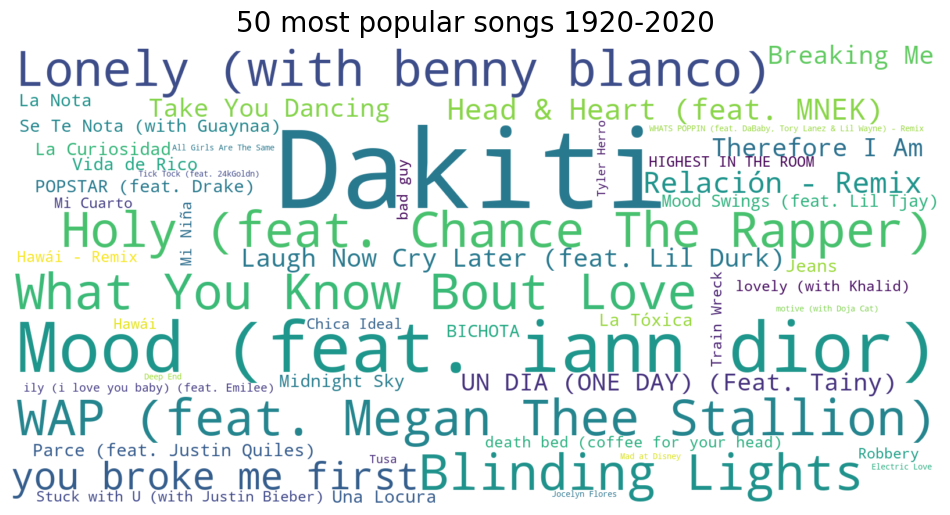

In [28]:
# plot a word cloud of the most popular songs over time
# create a dictionary of genre and their popularity
song_popularity = dat[['name', 'popularity']].set_index('name').to_dict()['popularity']
# sort the dictionary by value
song_popularity = sorted(song_popularity.items(), key=lambda x: x[1], reverse=True)

# create a word cloud
wordcloud = WordCloud(width=1600, height=800, max_words=50, background_color='white').generate_from_frequencies(dict(song_popularity))
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('50 most popular songs 1920-2020', fontsize=20)
plt.show()

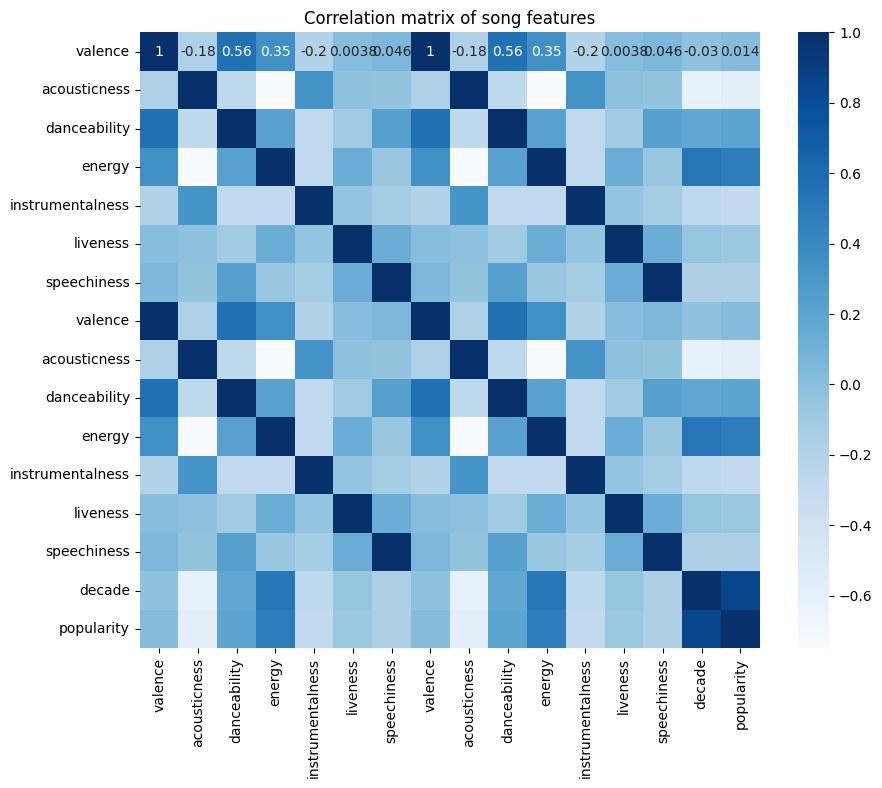

In [29]:
# make a correlation matrix of the song features, see what is more correlated with the popularity
all_features = song_features_normalized + song_features_normalized + ['decade', 'popularity']

# apply standardization to the features
scaler = StandardScaler()
feature_for_corr = scaler.fit_transform(dat[all_features])

# make a correlation matrix
corr = np.corrcoef(feature_for_corr.T)

# plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, xticklabels=all_features, yticklabels=all_features, cmap='Blues')
plt.title('Correlation matrix of song features')
plt.show()

In [30]:
# we can also check the most popular songs in each decade
# create a dictionary of artist and their popularity
song_popularity_decade = dat.groupby(['decade', 'name'])['popularity'].mean().reset_index()
song_popularity_decade = song_popularity_decade.sort_values(by=['decade', 'popularity'], ascending=False)
# # select the first artist in each decade
song_popularity_decade = song_popularity_decade.groupby('decade').head(1)
song_popularity_decade

,decade,name,popularity
136538,2010,Dakiti,100.0
122010,2000,"Hey, Soul Sister",83.0
106574,1990,Let It Snow! Let It Snow! Let It Snow! (with T...,80.0
84208,1980,Every Breath You Take,84.0
63057,1970,Back In Black,84.0
56323,1960,Rockin' Around The Christmas Tree,85.0
35943,1950,Johnny B. Goode,75.0
20035,1940,It's Beginning To Look Like Christmas,71.0
9606,1930,"It's Been a Long, Long Time",60.0
3460,1920,Monster Faladoré,55.0


## Building a recommendation system

In [31]:
# build a recommendation system using the song features
# define the features to be used in the recommendation system

# features = song_features_normalized + song_features_not_normalized
features = song_features_normalized + song_features_not_normalized + ['decade', 'popularity']

# make a new dataframe, apply standardization to the features
scaler = StandardScaler()
feature_for_recommendation = scaler.fit_transform(dat[features])

# create a dataframe as a copy of the original dataframe and with the standardized features
dat_recommendation = dat.copy()
dat_recommendation[features] = feature_for_recommendation

# turn all song names into uppercase
dat_recommendation['name'] = dat_recommendation['name'].str.upper()

# save the dataframe
# dat_recommendation.to_csv('data/processes/dat_for_recommender.csv', index=False)

In [32]:
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

# define a function to get feature vector of a given song
def get_feature_vector(song_name, year):
# def get_feature_vector(song_name, artist):
    dat_song = dat_recommendation.query('name == @song_name & year == @year')
    # dat_song = dat_recommendation.query('name == @song_name & artists == @artist')
    song_repeated = 0
    if dat_song.shape[0] == 0:
        raise Exception('The song does not exist in the dataset! \n Use search function first if you are not sure')
    if dat_song.shape[0] > 1:
        song_repeated = dat_song.shape[0]
        print(f'Warning: Multiple ({song_repeated}) songs with the same name and artist, the first one is selected!')
        dat_song = dat_song.head(1)
    feature_vector = dat_song[features].values
    return feature_vector, song_repeated

# define a function to get the most similar songs
def get_similar_songs(song_name, year, top_n=10, plot_type='wordcloud'):
    feature_vector, song_repeated = get_feature_vector(song_name, year)

    # calculate the cosine similarity
    similarities = cosine_similarity(dat_recommendation[features].values, feature_vector).flatten()
    # similarities = euclidean_distances(dat_recommendation[features].values, feature_vector).flatten()

    # get the index of the top_n similar songs not including itself
    if song_repeated == 0:
        related_song_indices = similarities.argsort()[-(top_n+1):][::-1][1:]
    else:
        related_song_indices = similarities.argsort()[-(top_n+1+song_repeated):][::-1][1+song_repeated:]
        
    # get the name, artist, and year of the most similar songs
    similar_songs = dat_recommendation.iloc[related_song_indices][['name', 'artists', 'year']]
    
    if plot_type == 'wordcloud':
        # make a word cloud of the most similar songs and year, use the simalirity score as the size of the words
        similar_songs['name+year'] = similar_songs['name'] + ' (' + similar_songs['year'].astype(str) + ')'
        # create a dictionary of song and their similarity
        song_similarity = dict(zip(similar_songs['name+year'], similarities[related_song_indices]))
        # sort the dictionary by value
        song_similarity = sorted(song_similarity.items(), key=lambda x: x[1], reverse=True)
        # # create a mask for the word cloud
        # mask = np.array(Image.open("spotify-logo.png"))
        # create a word cloud
        wordcloud = WordCloud(width=1600, height=800, max_words=50, 
                            background_color='white', colormap='Set2').generate_from_frequencies(dict(song_similarity))
        plt.figure(figsize=(12,10))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f'{top_n} most similar songs to: {song_name} ({year})', fontsize=20)
        plt.tight_layout(pad=0)
        plt.show()
    
    elif plot_type == 'bar':
        # plot the text of the most similar songs and year in order, like a stacked bar chart
        similar_songs['name+year'] = similar_songs['name'] + ' (' + similar_songs['year'].astype(str) + ')'
        # create a dictionary of song and their similarity
        song_similarity = dict(zip(similar_songs['name+year'], similarities[related_song_indices]))
        # sort the dictionary by value
        song_similarity = sorted(song_similarity.items(), key=lambda x: x[1], reverse=True)
        # plot the text of the most similar songs and year in order, like a stacked bar chart
        plt.figure(figsize=(12,10))
        plt.barh(range(len(song_similarity)), [val[1] for val in song_similarity], 
                 align='center', color=sns.color_palette('pastel', len(song_similarity)))
        plt.yticks(range(len(song_similarity)), [val[0] for val in song_similarity])
        plt.gca().invert_yaxis()
        plt.title(f'{top_n} most similar songs to: {song_name} ({year})', fontsize=20)
        min_similarity = min(similarities[related_song_indices])
        max_similarity = max(similarities[related_song_indices])
        # add song name on the top of each bar
        for i, v in enumerate([val[0] for val in song_similarity]):
            plt.text(min_similarity*0.955, i, v, color='black', fontsize=12)
        # plt.xlabel('Similarity', fontsize=15)
        # plt.ylabel('Song', fontsize=15)
        plt.xlim(min_similarity*0.95, max_similarity)
        # not show figure frame and ticks
        plt.box(False)
        plt.tick_params(axis='both', which='both', bottom=False, top=False, labelbottom=False, left=False, right=False, labelleft=False)
        
        plt.show()
    # return similar_songs


# define a search function to search for a song and return its information
def search_song(song_name):
    dat_song = dat_recommendation.query('name == @song_name')
    if dat_song.shape[0] == 0:
        raise Exception('The song does not exist in the dataset!')
    print(f"Great! This song is in the dataset: {dat_song[['name', 'artists', 'release_date']].to_numpy()}")
    # return dat_song[['name', 'artists', 'year', 'release_date']]

In [40]:
# my_song = 'I TALK TO THE WIND'
# my_song = 'SMELLS LIKE TEEN SPIRIT'
# my_song = 'YOUR HAND IN MINE'
# my_song = 'OLSEN OLSEN'
my_song = '突然好想你'  # it even works for Chinese songs!
# my_song = 'GATI BALI'

search_song(my_song)

Great! This song is in the dataset: [['突然好想你' "['Mayday']" '2008-10-23']]


C:\Users\donda\AppData\Local\Temp\ipykernel_16936\956750967.py:51: UserWarning: Glyph 31361 (\N{CJK UNIFIED IDEOGRAPH-7A81}) missing from current font.
  plt.tight_layout(pad=0)
C:\Users\donda\AppData\Local\Temp\ipykernel_16936\956750967.py:51: UserWarning: Glyph 28982 (\N{CJK UNIFIED IDEOGRAPH-7136}) missing from current font.
  plt.tight_layout(pad=0)
C:\Users\donda\AppData\Local\Temp\ipykernel_16936\956750967.py:51: UserWarning: Glyph 22909 (\N{CJK UNIFIED IDEOGRAPH-597D}) missing from current font.
  plt.tight_layout(pad=0)
C:\Users\donda\AppData\Local\Temp\ipykernel_16936\956750967.py:51: UserWarning: Glyph 24819 (\N{CJK UNIFIED IDEOGRAPH-60F3}) missing from current font.
  plt.tight_layout(pad=0)
C:\Users\donda\AppData\Local\Temp\ipykernel_16936\956750967.py:51: UserWarning: Glyph 20320 (\N{CJK UNIFIED IDEOGRAPH-4F60}) missing from current font.
  plt.tight_layout(pad=0)
c:\Users\donda\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserW

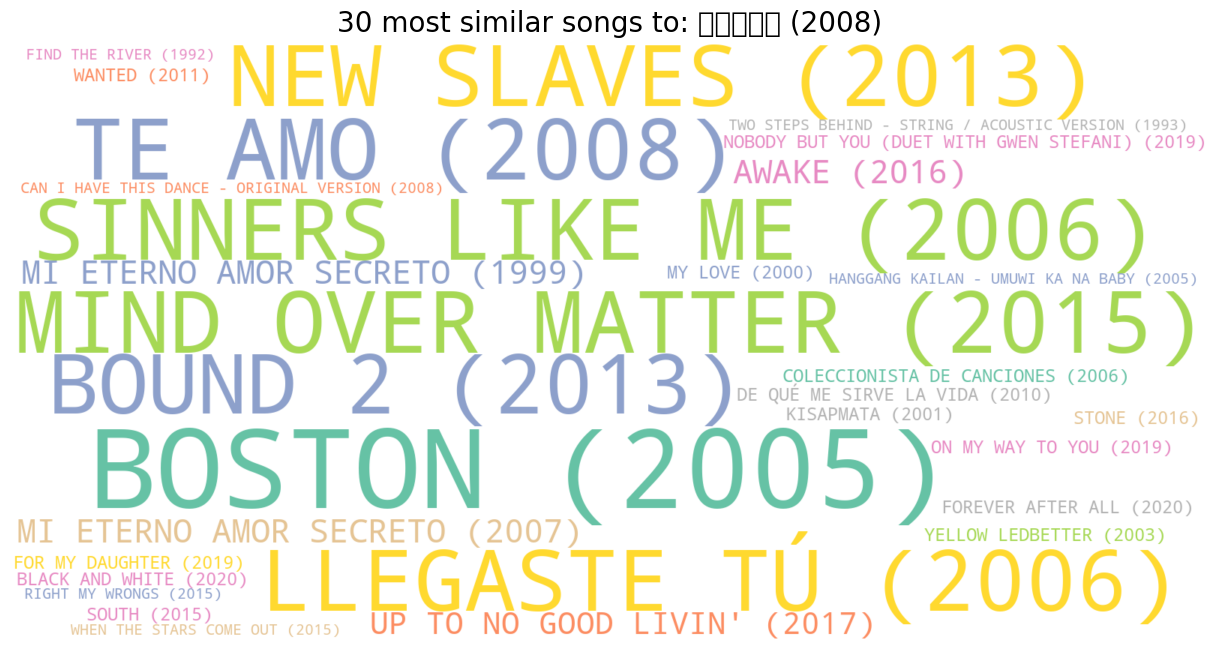

In [41]:
get_similar_songs(my_song, 2008, top_n=30, plot_type='wordcloud')

c:\Users\donda\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 31361 (\N{CJK UNIFIED IDEOGRAPH-7A81}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\donda\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 28982 (\N{CJK UNIFIED IDEOGRAPH-7136}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\donda\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 22909 (\N{CJK UNIFIED IDEOGRAPH-597D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\donda\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 24819 (\N{CJK UNIFIED IDEOGRAPH-60F3}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\donda\AppData\Local\Programs\Python\Python311\Lib\site-packages

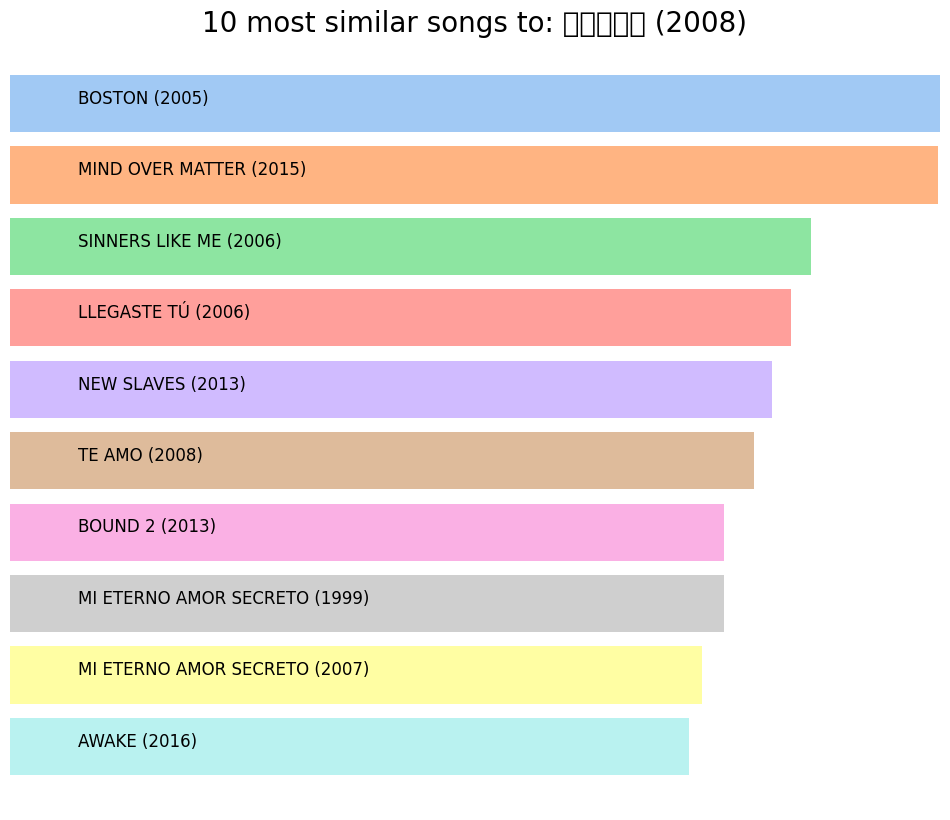

In [42]:
get_similar_songs(my_song, 2008, top_n=10, plot_type='bar')